# Email Spam Filtering Project

In [ ]:
!pip install NLTK

## Import required libraries

In [ ]:
import nltk as nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Reading Data

In [ ]:
sms_df = pd.read_csv("/content/drive/MyDrive/datasets/SMSSpamCollection.csv",sep = '\t',header  = None)
sms_df.columns = ['label','body_text']

In [ ]:
sms_df.head(5)

,label,body_text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 2. Data Understanding

## Exlporing Data Set

In [ ]:
sms_df.shape

(5572, 2)

In [ ]:
sms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      5572 non-null   object
 1   body_text  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
sms_df.describe()

,label,body_text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
sms_df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [ ]:
sms_df.label.value_counts(normalize = True)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

<Axes: ylabel='label'>

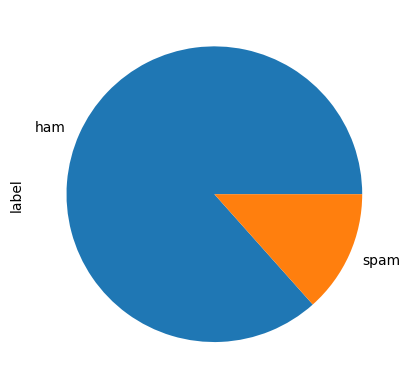

In [ ]:
sms_df.label.value_counts(normalize = True).plot.pie()

In [ ]:
df = sms_df.copy()

## 3. Data Prepartaion

### Removing punctuation

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punct(text):

    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

df['body_text_nopunc'] = df['body_text'].apply(lambda x: remove_punct(x))

### Creating new column in data with no punctuation

In [ ]:
df.head()

,label,body_text,body_text_nopunc
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...


## 3.2 Converting text to lowercase

In [ ]:
def remove_punct(text):

    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

df['body_text_nopunc'] = df['body_text'].apply(lambda x: remove_punct(x.lower()))

In [ ]:
df.head()

,label,body_text,body_text_nopunc
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


##3.3 Tokenization

In [ ]:
import re
from nltk.tokenize import word_tokenize

In [ ]:
def tokenize(text):
    tokens = word_tokenize(text)
    return tokens
df['body_text_tokenized'] = df['body_text_nopunc'].apply(lambda x: tokenize(x))

In [ ]:
df.head()

,label,body_text,body_text_nopunc,body_text_tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."


##3.4 Removing Stop-Words

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stopwords_En = nltk.corpus.stopwords.words('english')
# English stop words
stopwords_En

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopwords_En]
    return text

df['body_text_nostop'] = df['body_text_tokenized'].apply(lambda x: remove_stopwords(x))

In [ ]:
df.head(8)

,label,body_text,body_text_nopunc,body_text_tokenized,body_text_nostop
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey there darling its been 3 weeks now...,"[freemsg, hey, there, darling, its, been, 3, w...","[freemsg, hey, darling, 3, weeks, word, back, ..."
6,ham,Even my brother is not like to speak with me. ...,even my brother is not like to speak with me t...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids..."
7,ham,As per your request 'Melle Melle (Oru Minnamin...,as per your request melle melle oru minnaminun...,"[as, per, your, request, melle, melle, oru, mi...","[per, request, melle, melle, oru, minnaminungi..."


## 3.5 Stemming

In [ ]:
import nltk
ps = nltk.PorterStemmer()

In [ ]:

def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

df['body_text_stemmed'] = df['body_text_nostop'].apply(lambda x: stemming(x))


In [ ]:
df.head(8)

,label,body_text,body_text_nopunc,body_text_tokenized,body_text_nostop,body_text_stemmed
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey there darling its been 3 weeks now...,"[freemsg, hey, there, darling, its, been, 3, w...","[freemsg, hey, darling, 3, weeks, word, back, ...","[freemsg, hey, darl, 3, week, word, back, id, ..."
6,ham,Even my brother is not like to speak with me. ...,even my brother is not like to speak with me t...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,..."
7,ham,As per your request 'Melle Melle (Oru Minnamin...,as per your request melle melle oru minnaminun...,"[as, per, your, request, melle, melle, oru, mi...","[per, request, melle, melle, oru, minnaminungi...","[per, request, mell, mell, oru, minnaminungint..."


## Lemmatization

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

In [ ]:
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

df['body_text_lemmatized'] = df['body_text_nostop'].apply(lambda x: lemmatizing(x))

In [ ]:
df.head(8)

,label,body_text,body_text_nopunc,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text_lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]"
5,spam,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey there darling its been 3 weeks now...,"[freemsg, hey, there, darling, its, been, 3, w...","[freemsg, hey, darling, 3, weeks, word, back, ...","[freemsg, hey, darl, 3, week, word, back, id, ...","[freemsg, hey, darling, 3, week, word, back, i..."
6,ham,Even my brother is not like to speak with me. ...,even my brother is not like to speak with me t...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,...","[even, brother, like, speak, treat, like, aid,..."
7,ham,As per your request 'Melle Melle (Oru Minnamin...,as per your request melle melle oru minnaminun...,"[as, per, your, request, melle, melle, oru, mi...","[per, request, melle, melle, oru, minnaminungi...","[per, request, mell, mell, oru, minnaminungint...","[per, request, melle, melle, oru, minnaminungi..."


# Create function to remove punctuation, tokenize, remove stopwords, and stem all in one


In [ ]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
     #tokens = re.split('\W+', text)
    tokens = word_tokenize(text)
    text = " ".join([ps.stem(word) for word in tokens if word not in stopwords_En])
    return text
df=df[['label','body_text']]
df['cleaned_text'] = df['body_text'].apply(lambda x: clean_text(x))

In [ ]:
df.shape

(5572, 3)

In [ ]:
df.head()

,label,body_text,cleaned_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though


## 4. Vectorizing text data


### 4.2.1: Count vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
features_CountVec = vectorizer.fit_transform(df['cleaned_text'])
print(features_CountVec.shape)
print('Sparse Matrix :\n', features_CountVec)
features_CountVec = pd.DataFrame(features_CountVec.toarray())
features_CountVec.columns = vectorizer.get_feature_names_out()
features_CountVec

(5572, 8092)
Sparse Matrix :
   (0, 3314)	1
  (0, 4094)	1
  (0, 5583)	1
  (0, 2233)	1
  (0, 1335)	1
  (0, 1739)	1
  (0, 3403)	1
  (0, 7848)	1
  (0, 4238)	1
  (0, 1737)	1
  (0, 2015)	1
  (0, 3366)	1
  (0, 1146)	1
  (0, 7644)	1
  (1, 5211)	1
  (1, 4273)	1
  (1, 4060)	1
  (1, 7760)	1
  (1, 5241)	1
  (2, 3128)	1
  (2, 2784)	2
  (2, 7807)	1
  (2, 2111)	1
  (2, 7773)	1
  (2, 2902)	2
  :	:
  (5568, 3314)	1
  (5568, 3662)	1
  (5568, 3117)	1
  (5568, 2812)	1
  (5569, 6822)	1
  (5569, 4826)	1
  (5569, 5520)	1
  (5569, 6520)	1
  (5570, 3128)	1
  (5570, 7683)	1
  (5570, 3794)	1
  (5570, 4362)	1
  (5570, 5007)	1
  (5570, 7464)	1
  (5570, 6542)	1
  (5570, 1766)	1
  (5570, 2742)	1
  (5570, 3233)	1
  (5570, 3455)	1
  (5570, 3909)	1
  (5570, 986)	1
  (5570, 1553)	1
  (5571, 4929)	1
  (5571, 7298)	1
  (5571, 6062)	1


,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4.2.2: Vectorizing Data: N-Grams

In [ ]:
ngram_vect = CountVectorizer(ngram_range=(1,3))
features_ngram = ngram_vect.fit_transform(df['cleaned_text'])
print(features_ngram.shape)
print('Sparse Matrix :\n', features_ngram)
features_ngram = pd.DataFrame(features_ngram.toarray())
features_ngram.columns = ngram_vect.get_feature_names_out()
features_ngram

(5572, 71184)
Sparse Matrix :
   (0, 24614)	1
  (0, 32763)	1
  (0, 47955)	1
  (0, 14595)	1
  (0, 6491)	1
  (0, 9598)	1
  (0, 26375)	1
  (0, 69193)	1
  (0, 33917)	1
  (0, 9590)	1
  (0, 12360)	1
  (0, 25850)	1
  (0, 4952)	1
  (0, 66682)	1
  (0, 24894)	1
  (0, 32764)	1
  (0, 47970)	1
  (0, 14598)	1
  (0, 6494)	1
  (0, 9602)	1
  (0, 26509)	1
  (0, 69216)	1
  (0, 33918)	1
  (0, 9591)	1
  (0, 12371)	1
  :	:
  (5570, 30269)	1
  (5570, 31725)	1
  (5570, 9825)	1
  (5570, 19026)	1
  (5570, 67265)	1
  (5570, 23428)	1
  (5570, 64967)	1
  (5570, 26846)	1
  (5570, 8411)	1
  (5570, 3614)	1
  (5570, 35487)	1
  (5570, 30270)	1
  (5570, 31726)	1
  (5570, 9826)	1
  (5570, 55875)	1
  (5570, 19027)	1
  (5570, 42915)	1
  (5570, 67266)	1
  (5570, 23429)	1
  (5571, 41916)	1
  (5571, 63341)	1
  (5571, 51438)	1
  (5571, 51441)	1
  (5571, 63365)	1
  (5571, 51442)	1


,008704050406,008704050406 sp,008704050406 sp arrow,0089mi,0089mi last,0089mi last four,0121,0121 2025050,0121 2025050 visit,01223585236,...,zyada kisi ko,üll,üll finish,üll finish buy,üll submit,üll submit da,üll take,üll take forev,〨ud,〨ud even
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4.2.3: Vectorizing Raw Data: TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
#tfidf = TfidfVectorizer(min_df=1)
tfidf = TfidfVectorizer( ngram_range=(2,2))
features_tfidf = tfidf.fit_transform(df['cleaned_text'])
print(features_tfidf.shape)
print('Sparse Matrix :\n', features_tfidf)
features_tfidf = pd.DataFrame(features_tfidf.toarray())
features_tfidf.columns = tfidf.get_feature_names_out()
features_tfidf

(5572, 31326)
Sparse Matrix :
   (0, 1938)	0.2773500981126146
  (0, 11219)	0.2773500981126146
  (0, 5276)	0.2773500981126146
  (0, 4017)	0.2773500981126146
  (0, 14680)	0.2773500981126146
  (0, 30463)	0.2773500981126146
  (0, 11502)	0.2773500981126146
  (0, 4022)	0.2773500981126146
  (0, 2635)	0.2773500981126146
  (0, 6267)	0.2773500981126146
  (0, 20969)	0.2773500981126146
  (0, 14169)	0.2773500981126146
  (0, 10829)	0.2773500981126146
  (1, 29982)	0.5126274600081803
  (1, 14091)	0.5126274600081803
  (1, 14764)	0.5126274600081803
  (1, 19453)	0.4600426738213366
  (2, 2229)	0.22133068873751155
  (2, 21710)	0.22133068873751155
  (2, 28062)	0.22133068873751155
  (2, 21578)	0.22133068873751155
  (2, 8396)	0.22133068873751155
  (2, 21956)	0.22133068873751155
  (2, 1123)	0.22133068873751155
  (2, 8814)	0.22133068873751155
  :	:
  (5567, 670)	0.2537004480728817
  (5567, 21293)	0.2243885070985284
  (5567, 20308)	0.24928925658739495
  (5567, 27791)	0.20674516444944924
  (5568, 9631)	0.57735026

,008704050406 sp,0089mi last,0121 2025050,01223585236 xx,01223585334 cum,0125698789 ring,02 user,020603 2nd,0207 153,02072069400 bx,...,zoe 18,zoe hit,zogtoriu stare,zoom cine,zouk nichol,zyada kisi,üll finish,üll submit,üll take,〨ud even
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 5. Feature Engineering

## 5.1: Create feature for the message length

In [ ]:
#Count length of message and subtract the white spaces from the message length
df['body_len'] = df['body_text'].apply(lambda x: len(x)-x.count(' ') )
df.head()

,label,body_text,cleaned_text,body_len
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,92
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,24
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...,128
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,39
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though,49


## 5.2: Create feature for the message length

In [ ]:
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round( count/(len(text) - text.count(" ")),3)*100

df['body_len'] = df['body_text'].apply(lambda x: len(x) - x.count(" "))
df['punct%'] = df['body_text'].apply(lambda x: count_punct(x))
df.head()

,label,body_text,cleaned_text,body_len,punct%
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,92,9.8
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,24,25.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...,128,4.7
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,39,15.4
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though,49,4.1


## 5.3: Create feature for The percent of characters in capital letters

In [ ]:
import string

def count_Cap(text):
    count = sum([1 for char in text if char.isupper()])
    return round( count/(len(text) - text.count(" ")),3)*100

df['body_len'] = df['body_text'].apply(lambda x: len(x) - x.count(" "))
df['cap%'] = df['body_text'].apply(lambda x: count_Cap(x))
df.head()

,label,body_text,cleaned_text,body_len,punct%,cap%
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,92,9.8,3.3
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,24,25.0,8.3
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...,128,4.7,7.8
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,39,15.4,5.1
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though,49,4.1,4.1


In [ ]:
df.describe()

,body_len,punct%,cap%
count,5572.000000,5572.000000,5572.000000
mean,65.780510,7.102872,7.947577
std,48.813252,6.633766,13.308903
min,2.000000,0.000000,0.000000
25%,29.000000,3.300000,3.100000
50%,50.000000,5.500000,4.500000
75%,99.250000,9.100000,7.400000
max,740.000000,100.000000,100.000000


Rescaling image using MinMax scaling (Normalization between 0 and 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
num_vars = ['body_len','punct%','cap%']
df[num_vars] = scaler.fit_transform(df[num_vars])

In [ ]:
df.head()

,label,body_text,cleaned_text,body_len,punct%,cap%
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,0.121951,0.098,0.033
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,0.029810,0.250,0.083
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...,0.170732,0.047,0.078
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,0.050136,0.154,0.051
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though,0.063686,0.041,0.041


In [ ]:
features_tfidf.shape

(5572, 31326)

In [ ]:
df.shape

(5572, 6)

# 6. Model Building

## 6.1 ML algorithm selection

In [ ]:
target= df['label']

final_df=df.drop(['label', 'body_text', 'cleaned_text'], axis=1)

In [ ]:
features_tfidf.head()

,008704050406 sp,0089mi last,0121 2025050,01223585236 xx,01223585334 cum,0125698789 ring,02 user,020603 2nd,0207 153,02072069400 bx,...,zoe 18,zoe hit,zogtoriu stare,zoom cine,zouk nichol,zyada kisi,üll finish,üll submit,üll take,〨ud even
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
final_df = pd.concat([final_df, pd.DataFrame(features_tfidf)], axis=1)

In [ ]:
final_df.head()

,body_len,punct%,cap%,008704050406 sp,0089mi last,0121 2025050,01223585236 xx,01223585334 cum,0125698789 ring,02 user,...,zoe 18,zoe hit,zogtoriu stare,zoom cine,zouk nichol,zyada kisi,üll finish,üll submit,üll take,〨ud even
0,0.121951,0.098,0.033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.029810,0.250,0.083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.170732,0.047,0.078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.050136,0.154,0.051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.063686,0.041,0.041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
target.head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: label, dtype: object

## 6.2 Split Training and Testing Data Sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_df,target,test_size=0.20)

In [ ]:
print('final_df= ',final_df.shape)
print('X_train.shape= ',X_train.shape)
print('X_test.shape= ',X_test.shape)
print('y_train.shape= ',y_train.shape)
print('y_test.shape= ',y_test.shape)

final_df=  (5572, 31329)
X_train.shape=  (4457, 31329)
X_test.shape=  (1115, 31329)
y_train.shape=  (4457,)
y_test.shape=  (1115,)


In [ ]:
X_train.head()

,body_len,punct%,cap%,008704050406 sp,0089mi last,0121 2025050,01223585236 xx,01223585334 cum,0125698789 ring,02 user,...,zoe 18,zoe hit,zogtoriu stare,zoom cine,zouk nichol,zyada kisi,üll finish,üll submit,üll take,〨ud even
5011,0.066396,0.157,0.039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114,0.176152,0.045,0.159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2830,0.172087,0.031,0.310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1050,0.147696,0.027,0.126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2517,0.023035,0.211,0.053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_train.head()

5011     ham
114     spam
2830    spam
1050    spam
2517     ham
Name: label, dtype: object

## 6.3 Random Forest  Algorithem

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(n_jobs=-1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [ ]:
print("Testing Score: ",rf_model.score(X_test,y_test))

Testing Score:  0.9533632286995516


In [ ]:
rf_model = RandomForestClassifier(n_jobs=-1,n_estimators=200)
rf_model.fit(X_train, y_train)

In [ ]:
print("Testing Score: ",rf_model.score(X_test,y_test))

Testing Score:  0.9524663677130045


# 7.  Data Splitting techniques

## 7.1 Changing test size

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_df,target,test_size=0.30)

In [ ]:
print('final_df= ',final_df.shape)
print('X_train.shape= ',X_train.shape)
print('X_test.shape= ',X_test.shape)
print('y_train.shape= ',y_train.shape)
print('y_test.shape= ',y_test.shape)

final_df=  (5572, 31329)
X_train.shape=  (3900, 31329)
X_test.shape=  (1672, 31329)
y_train.shape=  (3900,)
y_test.shape=  (1672,)


In [ ]:
rf_model = RandomForestClassifier(n_jobs=-1)
rf_model.fit(X_train, y_train)
rf_model.score(X_test,y_test)

0.9539473684210527

## 7.2 Explore RandomForestClassifier through Cross-Validation

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)
accuracy_scores = cross_val_score(rf, final_df, target, cv=k_fold, scoring='accuracy', n_jobs=-1)

In [ ]:
# Calculate the average accuracy across all folds
average_accuracy = accuracy_scores.mean()
print("Average Accuracy:", average_accuracy)

Average Accuracy: 0.9524401220503821
